# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for this week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [35]:
import pandas as pd

# Import the data using the file path
#filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
filepath = '/home/shua/Desktop/MachonLev_DataMininig/Machine_Learning/Week2/Intel-ML101-Class2/data/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(filepath)

In [36]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [37]:
data

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [38]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [39]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [40]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [41]:
data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,109,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [42]:
# from sklearn import set_config
# set_config(transform_output='pandas')

In [43]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler() #default is to scale each feature to a range of [0,1]

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [44]:
data.head(5)

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [45]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [46]:
X_data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [47]:
y_data

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churned, Length: 5000, dtype: float64

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [49]:
y_data.values[10:20],y_pred[10:20]

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [50]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [51]:
print(accuracy(y_data, y_pred))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

Shua-Answer: The weights are the inverse of their distance. Therefore, closer neighbors of a query point will have a greater influence than neighbors which are further away. Here, each "node" is weighting its own corresponding "node" in the model extremely high. Therefore, even if there are many different labels in the general vicinity of the current node, it will always classify it as the correct label, due to the intensity of the distance weight applied.


In [52]:
#Student writes code here
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
print(accuracy(y_data, y_pred))


1.0


In [53]:
# knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan') 
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1) 

knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
print(accuracy(y_data, y_pred))

0.9456


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

[]

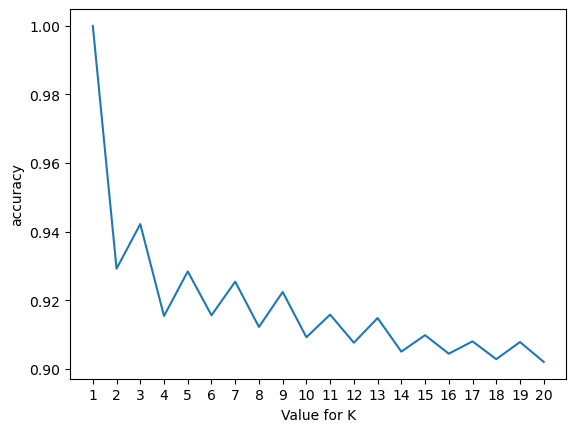

In [54]:
#Student writes code here
results = []
for k in range(1,21):
    knn = KNeighborsClassifier(k)
    knn.fit(X_data, y_data)
    y_pred = knn.predict(X_data)
    results.append(accuracy(y_data, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,21), results)
plt.xticks(range(1,21))
plt.ylabel('accuracy')
plt.xlabel('Value for K')
plt.plot()

# Now with Iris

Load, shuffle and split Iris data (Lesson 1)
... don´t forget scaling features

In [55]:
import numpy as np
import pandas as pd

filepath = '/home/shua/Desktop/MachonLev_DataMininig/Machine_Learning/Week2/Intel-ML101-Class2/data/Iris_Data.csv'
data = pd.read_csv(filepath)
print(data.columns,data.shape)
data

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


X = frames, 
y = target

In [56]:
y = data.pop('species').to_frame()
X = data

In [57]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
             species
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virginica
 149  Iris-virginica
 
 [150 rows 

In [58]:
np.std(X)

sepal_length    0.825301
sepal_width     0.432147
petal_length    1.758529
petal_width     0.760613
dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y,stratify=y, test_size=0.75, random_state=42)

In [67]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((37, 4), (37, 1), (113, 4), (113, 1))

In [68]:
X_train,y_train

(     sepal_length  sepal_width  petal_length  petal_width
 68            6.2          2.2           4.5          1.5
 119           6.0          2.2           5.0          1.5
 80            5.5          2.4           3.8          1.1
 32            5.2          4.1           1.5          0.1
 24            4.8          3.4           1.9          0.2
 52            6.9          3.1           4.9          1.5
 118           7.7          2.6           6.9          2.3
 50            7.0          3.2           4.7          1.4
 92            5.8          2.6           4.0          1.2
 46            5.1          3.8           1.6          0.2
 101           5.8          2.7           5.1          1.9
 12            4.8          3.0           1.4          0.1
 112           6.8          3.0           5.5          2.1
 128           6.4          2.8           5.6          2.1
 3             4.6          3.1           1.5          0.2
 98            5.1          2.5           3.0          1

Train a k-NN classifier on the training data, test on the testing data, explore different settings, number of input features, accuracies, ..., compare with colleagues, write conclusions

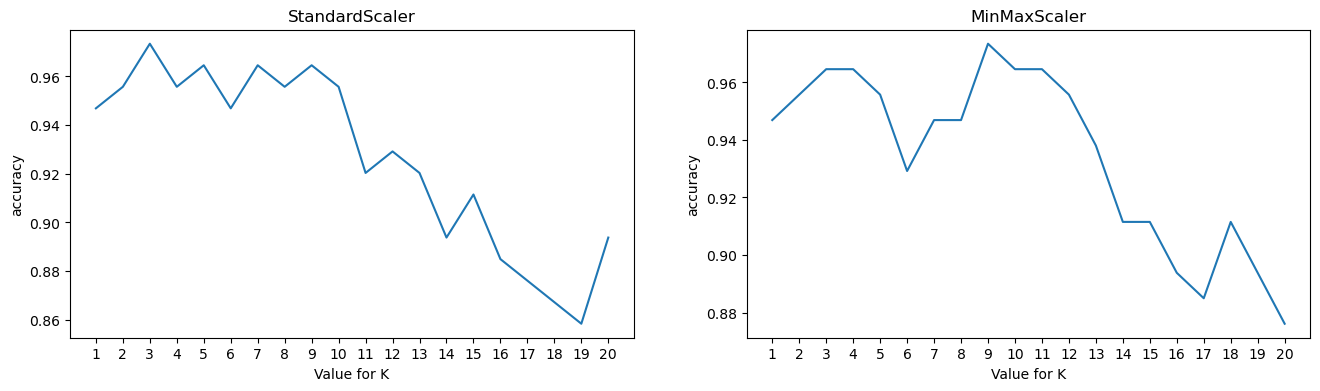

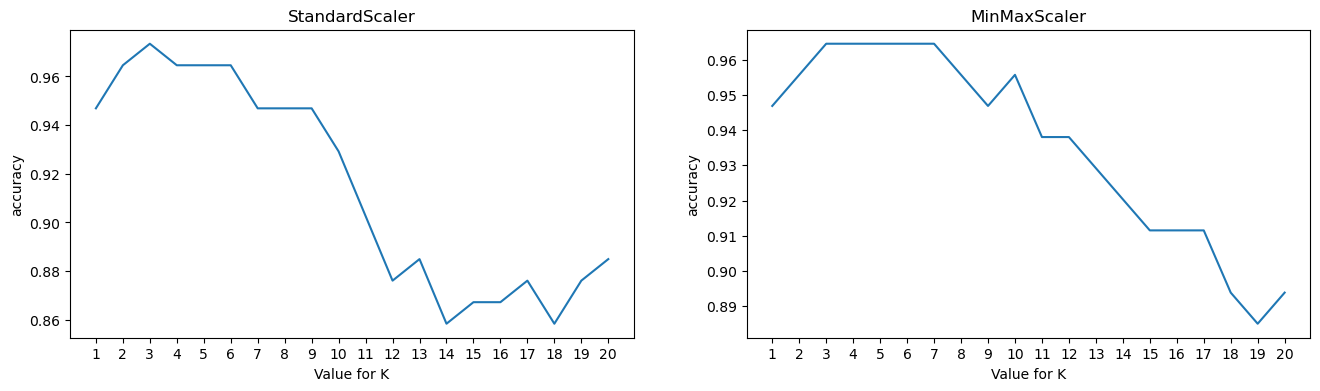

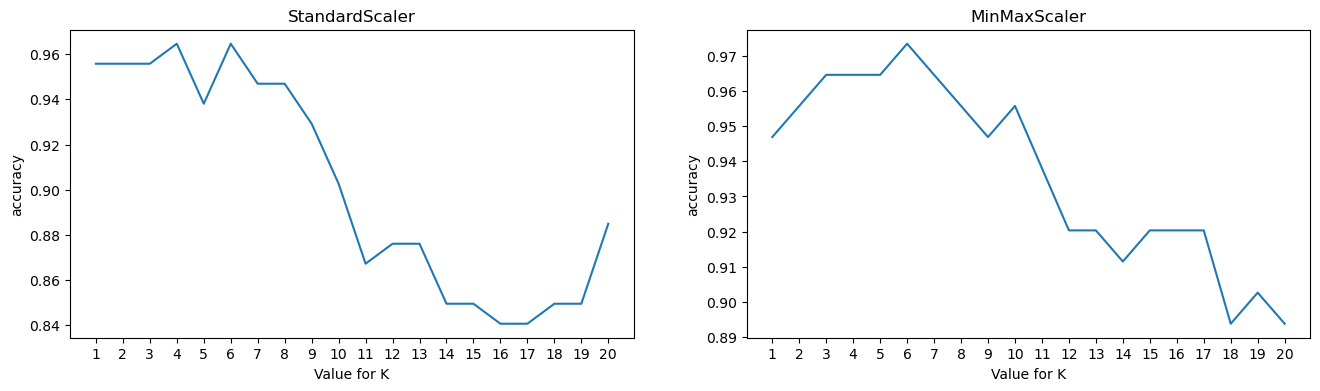

In [77]:
#Student writes code here

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#Use label encoding for the target variable (encoder encodes from 0 to n-1)
labeler = LabelEncoder()
y_test = labeler.fit_transform(y_test)
y_train = labeler.fit_transform(y_train)

for p in [1,2,3]: #Testing for different values of p
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    for i, scaler in enumerate([StandardScaler(), MinMaxScaler()]): #:Loop through the different scalers- curious how the results will differ.
        x_train_scaled = scaler.fit_transform(X_train)
        x_test_scaled = scaler.transform(X_test)

        results = []
        for k in range(1,21):
            knn = KNeighborsClassifier(n_neighbors=k, p=p)
            knn.fit(x_train_scaled, y_train)
            y_pred = knn.predict(x_test_scaled)
            results.append(accuracy(y_test, y_pred))

        ax[i].plot(range(1,21), results)
        ax[i].set_xticks(range(1,21))
        ax[i].set_ylabel('accuracy')
        ax[i].set_xlabel('Value for K')
        ax[i].set_title(scaler.__class__.__name__)
        #show the subplot
    plt.show()